# **Import Necessary Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for different plot
from sklearn.preprocessing import OneHotEncoder #for data preprocessing
from sklearn.preprocessing import StandardScaler #for scaling data
from sklearn.model_selection import train_test_split
#for data preprocessing using keras
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# keras classes required for building deep CNN model
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.utils import plot_model
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [4]:
images=[]
labels=[]

# oop over top 10 folders
for directory in os.listdir('/content/drive/MyDrive/Prodigy InfoTech/PRODIGY_ML_04/leapGestRecog/'):
    for subdir in os.listdir(os.path.join('/content/drive/MyDrive/Prodigy InfoTech/PRODIGY_ML_04/leapGestRecog/',directory)):
#         if directory=='01':
#             labels.append(subdir)
        for image in os.listdir(os.path.join('/content/drive/MyDrive/Prodigy InfoTech/PRODIGY_ML_04/leapGestRecog/',directory, subdir)):
            img_path = os.path.join('/content/drive/MyDrive/Prodigy InfoTech/PRODIGY_ML_04/leapGestRecog/', directory, subdir, image)
            images.append(img_path)
            labels.append(subdir)


# print(labels)

# **Read Images and Labels in the Dataset**

In [5]:
#include both image path and labels into dataframe
df = pd.DataFrame({'Image':images,'Label':labels})
df.tail()
# df.info()


,Image,Label
20095,/content/drive/MyDrive/Prodigy InfoTech/PRODIG...,04_fist_moved
20096,/content/drive/MyDrive/Prodigy InfoTech/PRODIG...,04_fist_moved
20097,/content/drive/MyDrive/Prodigy InfoTech/PRODIG...,04_fist_moved
20098,/content/drive/MyDrive/Prodigy InfoTech/PRODIG...,04_fist_moved
20099,/content/drive/MyDrive/Prodigy InfoTech/PRODIG...,04_fist_moved


# **Randomly Display some labeled images from the dataset**

[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


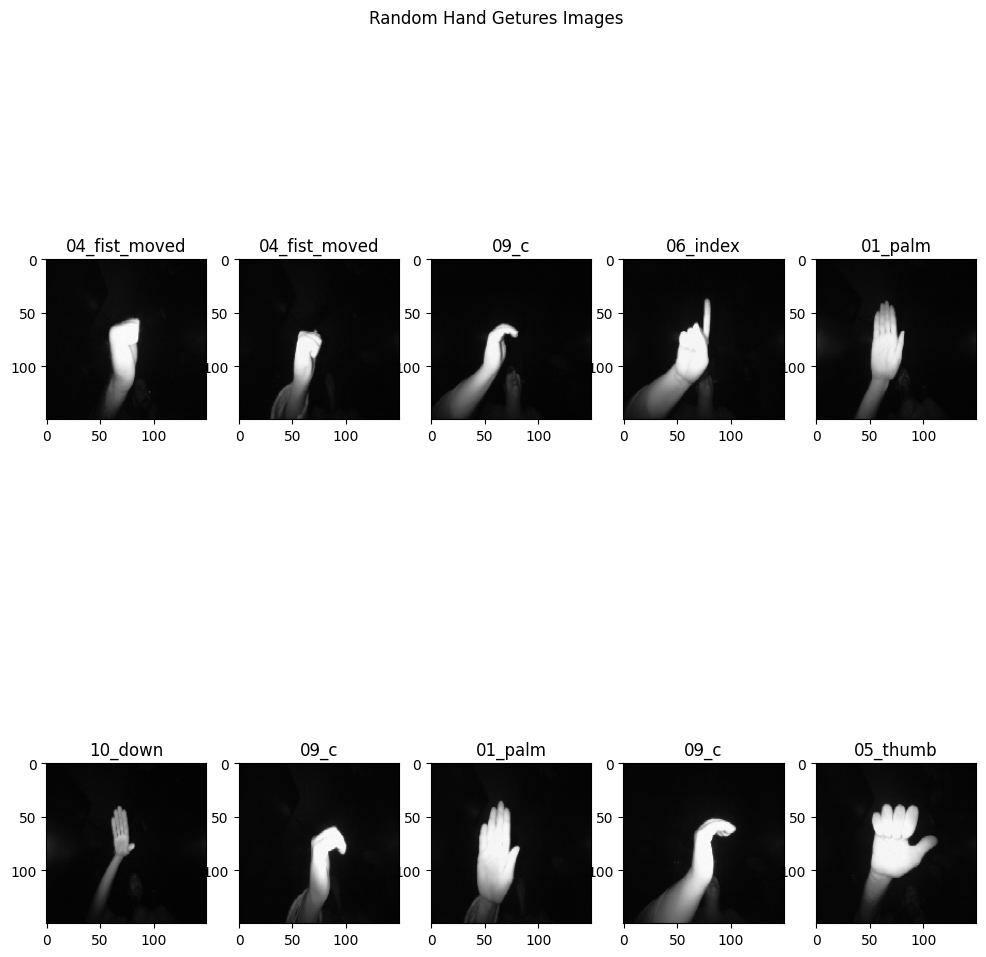

In [6]:
df_img = df['Image']
df_label = df['Label']

nrows=2
ncols = 5
fig,axx = plt.subplots(nrows,ncols, figsize=(12,12))
fig.suptitle("Random Hand Getures Images")
print(axx)
#axx = axx.ravel()
df_length = len(df)
for i in range(nrows):
        for j in range(ncols):
                #n = np.random.randint(0,20000)
                n = np.random.randint(0, df_length)
                img = load_img(df['Image'][n],target_size=(150,150)) #this is a PIL image
                img = img_to_array(img) #this is a numpy array with shape (3,150,150)
                img = np.expand_dims(img,axis=0) #expand image dimention to (1,3,255,255)
                img /= 255.0 #scale image values between 0,1
                label = df_label[n]
                #changing size from (1,150,150,3) into (150,150,3)
                image = np.squeeze(img)
                axx[i][j].imshow(image)
                axx[i][j].set_title(label)
plt.show()
plt.close()


# **Split Dataset into 70% for training 15%,15% for validation and testing**

In [7]:
x_train,x = train_test_split(df, test_size = 0.3)
# train_x, test_x, train_y, test_y = train_test_split(images,labels,test_size=0.2)
x_valid,x_test = train_test_split(x,test_size=0.5)
x_train.info()
x_valid.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14070 entries, 14369 to 14070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   14070 non-null  object
 1   Label   14070 non-null  object
dtypes: object(2)
memory usage: 329.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 7067 to 17477
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   3015 non-null   object
 1   Label   3015 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 17120 to 13760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   3015 non-null   object
 1   Label   3015 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB


# **Data Augmentation**

In [8]:
#data augmentation
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1.0/255)

In [9]:
b_size =1
train_generator = train_datagen.flow_from_dataframe(dataframe=x_train,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=True)
valid_generator = validate_datagen.flow_from_dataframe(dataframe=x_valid,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=False)


Found 14003 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 67 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


Found 2994 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 21 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


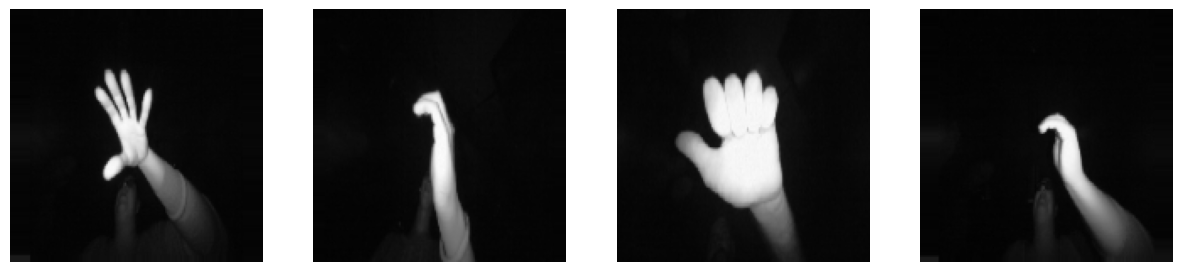

In [10]:
#plot some augmented images
fig,axx = plt.subplots(nrows=1,ncols=4, figsize=(15,15))

for i in range(4):
    #convert into unsigned integers for plotting
    image = next(train_generator)[0].astype('float64')
    #changing size from (1,150,150,3) into (150,150,3)
    image = np.squeeze(image)
    #plot row pixel data
    axx[i].imshow(image)
    axx[i].axis('off')

In [11]:
# #[3]:

# images list & labels list
# images = []
# labels = []

# image = df['Image']
# img = load_img(image[i],target_size=(150,150)) #this is a PIL image

# for i in range(len(df)):
#     img = load_img(image[i])
#     x = img_to_array(img) #this is a numpy array with shape (3,150,150)
# #     x = np.expand_dims(x,axis=0) #expand image dimention to (1,3,255,255)
# #     x /= 255.0 #scale image values between 0,1
#     images.append(x)
#     label = df_label[i]
#     labels.append(label)




# **Build Convolutional Neural Network Model (CNN)**

In [12]:
#Build Convolutional Neural Network Model (CNN)¶

#3 Cov2D layers with Relu activation functions followed by max-pooling layers that ouput 3D feature maps
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# on top of the model we add 2 fully connected layers to flatten the 3D feature maps into 10 feature victors representing 10 differnet categories of hanf geatures
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer = 'adam',
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

# **Visualize Model**

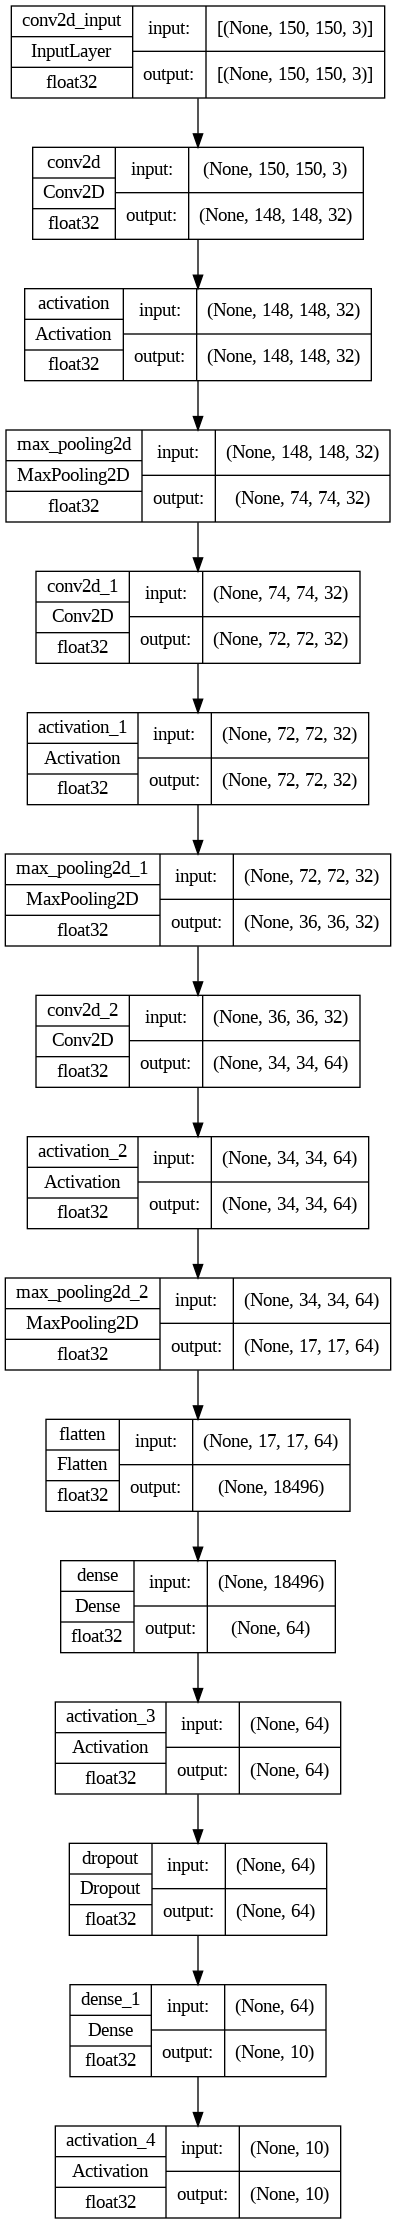

In [13]:
# Visualize model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True
)

# **Train and save Model**

In [ ]:
#train Test data in the model
history = model.fit(train_generator,
                   steps_per_epoch=2000//b_size,
                   epochs = 20,
                   validation_data = valid_generator,
                    validation_steps=800//b_size)

model.save('handG_R.h5')

Epoch 1/20
2000/2000 [==============================] - 959s 479ms/step - loss: 1.5923 - categorical_accuracy: 0.4435 - val_loss: 0.5947 - val_categorical_accuracy: 0.8325
Epoch 2/20
2000/2000 [==============================] - 571s 285ms/step - loss: 0.7214 - categorical_accuracy: 0.7520 - val_loss: 0.2278 - val_categorical_accuracy: 0.9237
Epoch 3/20
2000/2000 [==============================] - 513s 257ms/step - loss: 0.4719 - categorical_accuracy: 0.8360 - val_loss: 0.1973 - val_categorical_accuracy: 0.9362
Epoch 4/20
2000/2000 [==============================] - 440s 220ms/step - loss: 0.3837 - categorical_accuracy: 0.8665 - val_loss: 0.1119 - val_categorical_accuracy: 0.9737
Epoch 5/20
2000/2000 [==============================] - 391s 195ms/step - loss: 0.3120 - categorical_accuracy: 0.8880 - val_loss: 0.0518 - val_categorical_accuracy: 0.9900
Epoch 6/20
2000/2000 [==============================] - 356s 178ms/step - loss: 0.2824 - categorical_accuracy: 0.9000 - val_loss: 0.0580 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# display loss & accuracy
history.history

{'loss': [1.5922768115997314,
  0.7213538885116577,
  0.4719383716583252,
  0.38366103172302246,
  0.3119904100894928,
  0.28235000371932983,
  0.27964067459106445,
  0.20808561146259308,
  0.19795380532741547,
  0.18800751864910126,
  0.1768912523984909,
  0.14718161523342133,
  0.1440896838903427,
  0.17729687690734863,
  0.11843550950288773,
  0.11979620903730392,
  0.13665129244327545,
  0.11981776356697083,
  0.12223535031080246,
  0.11588986217975616],
 'categorical_accuracy': [0.44350001215934753,
  0.7519999742507935,
  0.8360000252723694,
  0.8665000200271606,
  0.8880000114440918,
  0.8999999761581421,
  0.9125000238418579,
  0.9334999918937683,
  0.9350000023841858,
  0.9355000257492065,
  0.9419999718666077,
  0.9539999961853027,
  0.9580000042915344,
  0.9474999904632568,
  0.9645000100135803,
  0.9595000147819519,
  0.9595000147819519,
  0.9649999737739563,
  0.9660000205039978,
  0.9629999995231628],
 'val_loss': [0.5947234034538269,
  0.22779908776283264,
  0.1972930580

# **Visualize training&validation loss**

In [ ]:
#visualize training loss & validation loss which indecates there is no overfitting
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['loss'],
mode='lines',
name=f'training loss',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_loss'],
                         mode='lines',
                         name=f'Validation loss',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training loss",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")

fig.update_layout({'plot_bgcolor': '#f2f8fd' ,
                   'paper_bgcolor': 'white',},
                   template='plotly_white')

# **Visualize training&validation accuracy**

In [ ]:
visualize training accuracy & validation accuracy
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['categorical_accuracy'],
mode='lines',
name=f'training accuracy',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_categorical_accuracy'],
                         mode='lines',
                         name=f'Validation accuracy',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training accuracy",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")

SyntaxError: invalid syntax (<ipython-input-17-952126eaf59d>, line 1)


# **Test Model to new data**

In [ ]:
x_test.info()
x_test.tail(20)
samples= x_test.sample(n=5)


In [ ]:
model = load_model('./handG_R.h5',compile=True)